# Testing differences between groups

In [1]:
# Import numerical, data and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Only show 4 decimals when printing
np.set_printoptions(precision=4)

In [2]:
# Show the plots in the notebook
%matplotlib inline

Imagine we have some some measures of psychopathy in 12 students.  4 students are from Berkeley, and 4 students are from MIT.

In [3]:
psychos = pd.read_csv('psycho_students.csv')
psychos

,psychopathy,clammy,university
0,11.416,0.389,Berkeley
1,4.514,0.200,Berkeley
2,12.204,0.241,Berkeley
3,14.835,0.463,Berkeley
4,8.416,4.585,Stanford
5,6.563,1.097,Stanford
6,17.343,1.642,Stanford
7,13.020,4.972,Stanford
8,15.190,7.957,MIT
9,11.902,5.585,MIT


We find that the mean score for the Berkeley students is different from the mean score for the MIT students:

In [4]:
berkeley_students = psychos[psychos['university'] == 'Berkeley']
berkeley_students

,psychopathy,clammy,university
0,11.416,0.389,Berkeley
1,4.514,0.200,Berkeley
2,12.204,0.241,Berkeley
3,14.835,0.463,Berkeley


In [5]:
mit_students = psychos[psychos['university'] == 'MIT']
mit_students

,psychopathy,clammy,university
8,15.190,7.957,MIT
9,11.902,5.585,MIT
10,22.721,5.527,MIT
11,22.324,6.964,MIT


In [6]:
berkeley_scores = berkeley_students['psychopathy']
mit_scores = mit_students['psychopathy']
berkeley_scores.mean(), mit_scores.mean()

(10.74225, 18.03425)

Here is the difference between the means:

In [7]:
mean_diff = berkeley_scores.mean() - mit_scores.mean()
mean_diff

-7.2919999999999998

That's the difference we see.  But - if we take any 8 students from a single university, and take the mean of the first four, and the mean of the second four, there will almost certainly be a difference in the means, just because there's some difference across individuals in the psychopathy score.  Is this difference we see unusual compared to the differences we would see if we took eight students from the same university, and compared the means of the first four and the second four?

For a moment, let us pretend that all our Berkeley and MIT students come from the same university.   Then I can pool the Berkely and MIT students together.

In [8]:
pooled = pd.concat([berkeley_scores, mit_scores]).values
pooled

array([ 11.416,   4.514,  12.204,  14.835,  15.19 ,  11.902,  22.721,
        22.324])

If there is no difference between Berkeley and MIT, then it should be OK to just shuffle the students to a random order, like this:

In [9]:
np.random.shuffle(pooled)
pooled

array([ 12.204,  15.19 ,  22.324,  11.902,  11.416,   4.514,  22.721,
        14.835])

Now I can just pretend that the first four students are from one university, and the last four are from another university.  Then I can compare the means.

In [10]:
fake_berkeley = pooled[:4]
fake_mit = pooled[4:]
np.mean(fake_berkeley) - np.mean(fake_mit)

2.0335000000000019

In [11]:
fake_differences = np.zeros(10000)
for i in range(10000):
    np.random.shuffle(pooled)
    diff = np.mean(pooled[:4]) - np.mean(pooled[4:])
    fake_differences[i] = diff

The 10000 values we calculated form the *sampling distribution*.  Let's have a look:

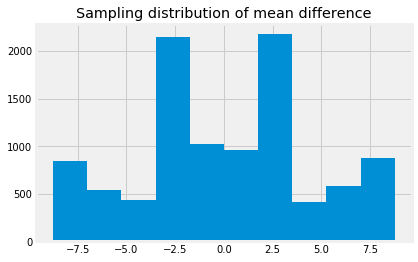

In [12]:
plt.hist(fake_differences)
plt.title("Sampling distribution of mean difference");

Where does the value we actually see, sit in this histogram? More specifically, how many of the values in this histogram are less then or equal to the value we actually see?

In [13]:
# We will count the number of fake_differences <= our observed
count = 0
# Go through each of the 10000 values one by one
for diff in fake_differences:
    if diff <= mean_diff:
        count = count + 1
proportion = count / 10000
proportion

0.0438

That's the p value.